In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings("ignore")

2023-05-12 17:30:19.175311: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-12 17:30:19.214971: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-12 17:30:19.215522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 17:30:19.902536: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!pip install tensorflow

# Load Dataset

In [ ]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [ ]:
len(X_test[0])

30000

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_test[1][99][0]

array([0.55294118, 0.52156863, 0.50980392])

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


[0.]


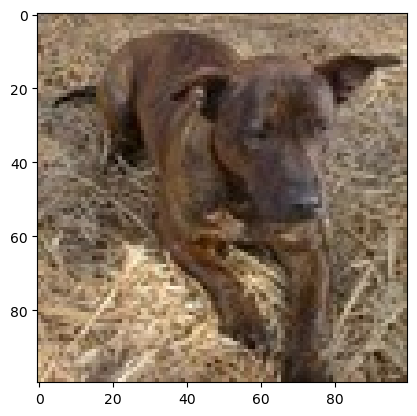

In [ ]:
idx = random.randint(0, len(X_train))
print(Y_train[idx, :])
plt.imshow(X_train[idx, :])
plt.show()


# Model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 5, batch_size = 32,validation_data=(X_test,Y_test))

Epoch 1/5
63/63 [==============================] - 7s 111ms/step - loss: 0.0853 - accuracy: 0.9745 - val_loss: 1.1010 - val_accuracy: 0.6800
Epoch 2/5
63/63 [==============================] - 7s 106ms/step - loss: 0.0621 - accuracy: 0.9845 - val_loss: 1.2091 - val_accuracy: 0.6425
Epoch 3/5
63/63 [==============================] - 7s 109ms/step - loss: 0.0503 - accuracy: 0.9855 - val_loss: 1.4113 - val_accuracy: 0.6500
Epoch 4/5
63/63 [==============================] - 7s 106ms/step - loss: 0.0252 - accuracy: 0.9960 - val_loss: 1.4808 - val_accuracy: 0.6450
Epoch 5/5
63/63 [==============================] - 7s 106ms/step - loss: 0.0154 - accuracy: 0.9975 - val_loss: 1.7170 - val_accuracy: 0.6725


In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 18ms/step - loss: 1.0414 - accuracy: 0.6450


[1.041410207748413, 0.6449999809265137]

# Making predictions

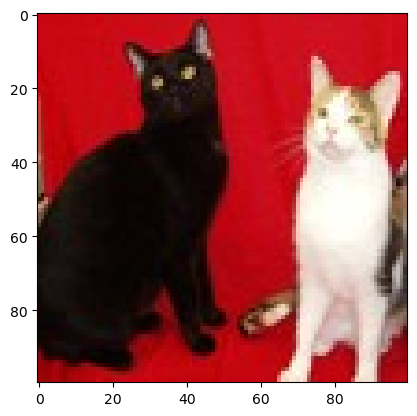

In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

In [ ]:
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred

1/1 [==============================] - 0s 13ms/step


array([[0.9998185]], dtype=float32)

In [ ]:
y_pred = y_pred > 0.5

y_pred

array([[ True]])

In [ ]:
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

Our model says it is a : cat


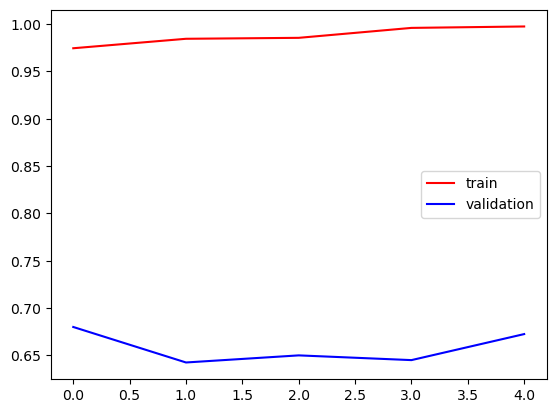

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()